In [1]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2024-01-31 17:27:39--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2024-01-31 17:27:39 (80.5 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [5]:
from helper_functions import *
import tensorflow as tf
import tensorflow_datasets as tfds

In [6]:
(train_data, test_data), ds_info = tfds.load(name='cifar10',
                                             split=['train', 'test'],
                                             as_supervised=True,
                                             shuffle_files=True,
                                             with_info=True,)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cifar10/3.0.2.incompleteNAZBYT/cifar10-train.tfrecord*...:   0%|          …

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cifar10/3.0.2.incompleteNAZBYT/cifar10-test.tfrecord*...:   0%|          |…

Dataset cifar10 downloaded and prepared to /root/tensorflow_datasets/cifar10/3.0.2. Subsequent calls will reuse this data.


In [8]:
single_sample = train_data.take(1)
single_sample

<_TakeDataset element_spec=(TensorSpec(shape=(32, 32, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [14]:
ds_info.features

FeaturesDict({
    'id': Text(shape=(), dtype=string),
    'image': Image(shape=(32, 32, 3), dtype=uint8),
    'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
})

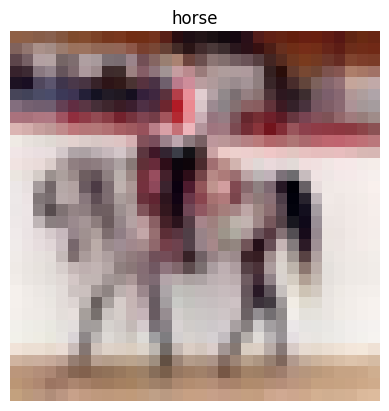

In [16]:
import matplotlib.pyplot as plt

# Get class names
class_names = ds_info.features['label'].names

# Plot image and label
for image, label in single_sample:
  plt.imshow(image)
  plt.title(class_names[label.numpy()])
  plt.axis(False)

In [17]:
image

<tf.Tensor: shape=(32, 32, 3), dtype=uint8, numpy=
array([[[143,  96,  70],
        [141,  96,  72],
        [135,  93,  72],
        ...,
        [ 96,  37,  19],
        [105,  42,  18],
        [104,  38,  20]],

       [[128,  98,  92],
        [146, 118, 112],
        [170, 145, 138],
        ...,
        [108,  45,  26],
        [112,  44,  24],
        [112,  41,  22]],

       [[ 93,  69,  75],
        [118,  96, 101],
        [179, 160, 162],
        ...,
        [128,  68,  47],
        [125,  61,  42],
        [122,  59,  39]],

       ...,

       [[187, 150, 123],
        [184, 148, 123],
        [179, 142, 121],
        ...,
        [198, 163, 132],
        [201, 166, 135],
        [207, 174, 143]],

       [[187, 150, 117],
        [181, 143, 115],
        [175, 136, 113],
        ...,
        [201, 164, 132],
        [205, 168, 135],
        [207, 171, 139]],

       [[195, 161, 126],
        [187, 153, 123],
        [186, 151, 128],
        ...,
        [212, 177, 147]

In [18]:
def preprocess_image(image, label, img_size=32):
  image = tf.image.resize(image, [img_size, img_size])
  image = tf.cast(image, tf.float32)
  image /= 255.
  return image, label


In [21]:
# test preprocess_image function on single image
preprocessed_img = preprocess_image(image, label)
print(f'image:{image[:2]}..., image shape: {image.shape}, image dtype: {image.dtype}')
print(f'prep_image:{preprocessed_img[:2]}, image shape:{preprocessed_img.shape}, image ddtype: {preprocessed_img.dtype}')

image:[[[143  96  70]
  [141  96  72]
  [135  93  72]
  [136  96  78]
  [131  86  63]
  [127  74  44]
  [131  75  46]
  [124  65  38]
  [117  54  29]
  [121  55  30]
  [113  45  20]
  [112  46  21]
  [116  50  29]
  [ 88  31  23]
  [ 42  12  16]
  [ 30  14  20]
  [ 34  20  23]
  [ 26  16  19]
  [ 18   9  14]
  [ 21   7  16]
  [ 42  15  24]
  [ 83  28  26]
  [ 96  32  21]
  [100  35  19]
  [ 99  30  13]
  [104  31  18]
  [105  31  16]
  [ 97  28  20]
  [ 86  23  20]
  [ 96  37  19]
  [105  42  18]
  [104  38  20]]

 [[128  98  92]
  [146 118 112]
  [170 145 138]
  [163 140 133]
  [155 124 110]
  [155 114  93]
  [156 115  95]
  [146 104  86]
  [145 103  86]
  [147 102  87]
  [141  87  72]
  [120  63  46]
  [121  71  53]
  [101  64  52]
  [ 67  43  39]
  [ 42  21  22]
  [ 65  43  44]
  [ 74  57  57]
  [ 60  45  46]
  [ 42  23  29]
  [ 43  16  23]
  [ 55  16  17]
  [ 76  30  22]
  [103  47  30]
  [111  45  22]
  [118  45  24]
  [114  45  23]
  [102  37  25]
  [ 93  29  21]
  [108  45  26]


In [ ]:
train_data